In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/regression_dataset.csv')
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,target
0,2.056544,0.606851,0.482688,-1.130888,0.420094,74.905613
1,-0.799192,-0.645964,-0.182896,-0.482744,1.374876,-41.649588
2,1.076007,-0.796026,-0.751969,0.021312,-0.319054,-24.182866
3,-0.103255,-0.828497,1.489863,-1.643189,-1.600904,-87.094505
4,-2.063403,0.503252,-0.645572,-0.317350,-1.661083,-86.122029


In [8]:
X = df.iloc[:,0:5].values

In [9]:
X.shape

(1000, 5)

In [10]:
y = df.iloc[:, -1].values

In [11]:
# divide the data into training and testing datset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
X_train.shape

(800, 5)

In [13]:
y_train.shape

(800,)

In [14]:
X_test.shape

(200, 5)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[ 0.24339027, -0.68151701,  0.24433541,  0.28033411,  0.35094239],
       [-2.00031195,  1.68616863,  0.6286018 ,  1.31117098, -0.66369733],
       [ 0.8800788 , -0.50559954, -0.029809  ,  0.53716987, -0.95615053],
       ...,
       [ 1.00006545, -0.48486441, -0.13590359, -0.05563406,  1.3809658 ],
       [ 1.14742103, -0.73466289,  1.25825956,  0.41423809, -0.63357754],
       [-0.74054328, -1.39966643,  0.50159807, -0.28244141, -0.04130052]])

In [17]:
X_test

array([[ 1.66714010e+00, -4.89238599e-01, -3.18638802e+00,
         3.17988740e-03,  2.18997325e-01],
       [ 1.23452291e+00,  1.17213826e-01, -7.57507198e-01,
         5.19572192e-02,  1.52104030e+00],
       [-1.60138719e+00,  1.56582639e+00,  1.14243944e+00,
         1.63363144e+00, -7.40594880e-01],
       [-4.48964072e-01, -3.60794099e-02, -1.33068128e+00,
        -7.17493175e-01, -5.79749518e-01],
       [-7.57371242e-01,  5.94700671e-01, -1.58608257e-01,
        -2.14242018e-01, -1.34124816e+00],
       [ 7.44382479e-01, -3.75150319e-01,  7.08166596e-01,
         4.33417155e-01, -2.18975776e-01],
       [-5.38424024e-01, -9.40870043e-02, -2.64514558e+00,
         2.30171796e-01,  3.91665520e-01],
       [-4.80731761e-01,  9.23514253e-01,  1.18965719e+00,
        -1.10976337e+00,  1.00661785e+00],
       [ 2.94025409e-01,  1.00175512e+00, -1.12202947e+00,
         1.76422401e+00,  1.43656396e+00],
       [-5.27327570e-01,  3.21968135e-01,  1.18905002e+00,
        -9.89492424e-02

In [20]:
#1st method to calculate k = sqrt(train_x)
np.sqrt(X_train.shape[0]) # k= 29(odd for accuracy)
k = 29

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = k)

In [27]:
#train our  model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=29)

In [28]:
y_train

array([-6.61044230e+00,  5.26440923e+01, -5.14604420e+00,  3.55653588e+01,
       -5.58131565e+01,  4.90961297e+01,  4.27471651e+01,  1.00316059e+02,
        1.28603490e+01,  9.08158323e+01, -4.52678519e-02,  5.01559467e+01,
       -1.26712274e+02, -2.28555613e+01,  2.16821593e+01, -3.36371374e+01,
        4.39505156e+01, -7.51747755e+01,  1.22693052e+02,  2.65810400e+01,
       -2.78259125e+01,  8.52184518e+01, -1.04586430e+02,  1.05054034e+02,
        3.18232861e+01, -3.53440623e+01,  7.54913838e+00, -2.07358177e+01,
       -6.93561507e+01, -8.96957009e+01,  4.43146836e+00,  2.24559806e+01,
       -2.28808293e+01,  4.25958672e+01,  8.18117340e+01, -4.96748158e+00,
       -6.23127408e+01,  1.36147170e+02,  1.19139878e+01,  1.62728567e+02,
       -3.72989376e+00, -1.70624220e+01, -1.40343341e+01, -2.95643188e+01,
       -1.28472521e+01,  1.99239711e+01, -4.83886695e+01, -2.41828662e+01,
       -2.63963727e+01, -3.05299493e+01, -1.51245424e+01,  7.15538524e+00,
       -6.21997808e+01, -

In [30]:
y_pred = knn.predict(X_test)

In [31]:
y_pred

array([ -13.33047541,   34.24730515,   44.53068331,  -51.04559095,
        -18.87529991,   19.89939831,  -39.87644878,   22.33178234,
         69.41437021,   -6.64604521,  -15.78762847,   83.98858453,
         49.03422033,   43.75930798,  -31.99877252,   12.46078591,
         44.90729879,   56.37052987,   71.4053543 ,   65.15466123,
         10.7558589 ,   -3.79658122,    8.68674527,   20.30844786,
         -9.60835386,    3.99821631,  -62.59391936,   19.87213445,
        -53.83659468,  -28.65409697,   51.82169896,   76.18929422,
         38.78795809,   53.7291247 ,   14.49775789,   -9.13412228,
        -51.04499443,   -8.19030186,  -14.65938166,   24.93101763,
        -78.03313574,   48.64854427,  -36.62337569,   40.64687167,
         46.88291614,   45.43670731,   45.15682477,  -26.3881912 ,
        -16.09499697,  -30.76495476,  -86.30105664,   42.11785113,
         70.53508916,   45.86116252,   47.89367766,  -43.17662844,
          9.25461018,   88.47295422,   34.88025529,  -26.16112

In [32]:
y_test.shape

(200,)

In [33]:
y_pred.shape

(200,)

In [35]:
# If they are float, convert them to discrete labels (e.g., using a threshold)
# Example:
threshold = 0  # Adjust this threshold as needed
y_pred_discrete = (y_pred > threshold).astype(int)
y_test_discrete = (y_test > threshold).astype(int)  # Assuming y_test is also continuous


In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_discrete, y_pred_discrete)
accuracy

0.965

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_discrete, y_test_discrete)

array([[97,  3],
       [ 4, 96]])

In [43]:
#2nd method to fix the value of k i.e. by accuracy score
accuracy = []
for i in range(1, 28):
  knn = KNeighborsRegressor(n_neighbors = i)
  knn.fit(X_train, y_train)
  threshold = 1 # Adjust this threshold as needed
  y_pred_discrete = (y_pred > threshold).astype(int)
  y_test_discrete = (y_test > threshold).astype(int)
  accuracy.append(accuracy_score(y_test_discrete, y_pred_discrete))

In [40]:
len(accuracy)

27

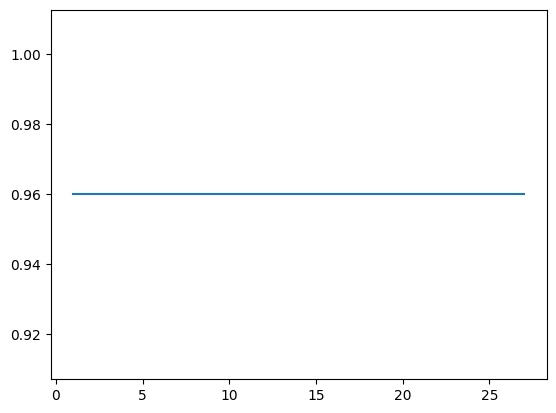

In [44]:
plt.plot(range(1, 28), accuracy)

In [45]:
knn = KNeighborsRegressor(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [46]:
threshold= 1
y_pred_discrete = (y_pred > threshold).astype(int)
y_test_discrete = (y_test > threshold).astype(int)

In [47]:
accuracy = accuracy_score(y_test_discrete, y_pred_discrete)
accuracy

0.96

In [ ]:
#trying to predict a value for a new user input
